# Лабораторная работа №1 “Линейная регрессия”

### *Набор данных ex1data1.txt представляет собой текстовый файл, содержащий информацию о населении городов (первое число в строке) и прибыли ресторана, достигнутой в этом городе (второе число в строке). Отрицательное значение прибыли означает, что в данном городе ресторан терпит убытки.*
### *Набор данных ex1data2.txt представляет собой текстовый файл, содержащий информацию о площади дома в квадратных футах (первое число в строке), количестве комнат в доме (второе число в строке) и стоимости дома (третье число).*

## **Задание**

### 1. Загрузите набор данных **ex1data1.txt** из текстового файла.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [43]:
ex1data1 = np.loadtxt('Data/Lab 1/ex1data1.txt', delimiter=',')
X, y = np.expand_dims(ex1data1[:, 0], axis=1), ex1data1[:, 1]

### 2. Постройте график зависимости прибыли ресторана от населения города, в котором он расположен.

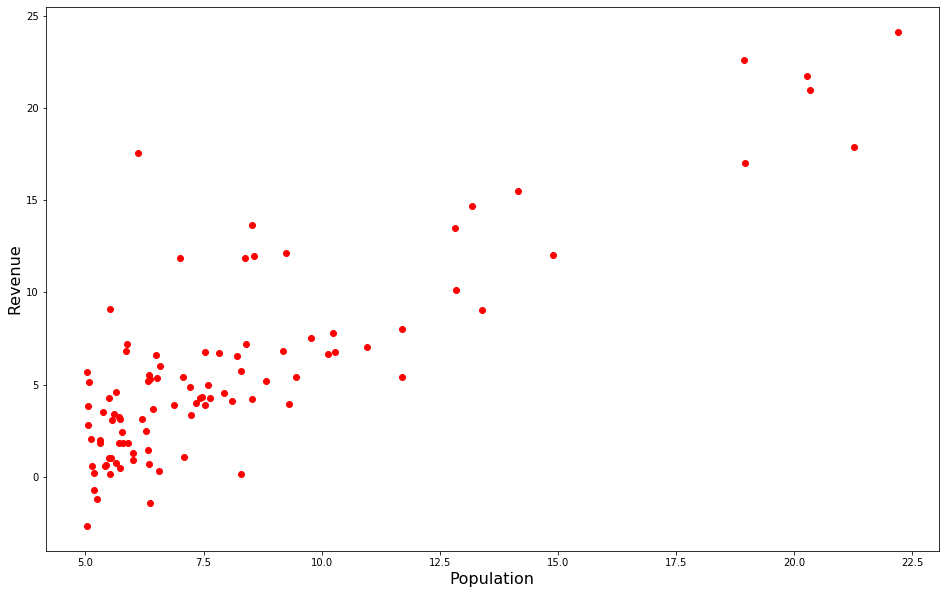

In [12]:
plt.figure(figsize=(16, 10))
plt.scatter(data[:, 0], data[:, 1], color='r')
plt.xlabel('Population', size=16)
plt.ylabel('Revenue', size=16)
plt.show()

### 3. Реализуйте функцию потерь J(θ) для набора данных **ex1data1.txt**.

In [6]:
class MSELoss:
    def __init__(self, model):
        self.model = model
        
    def __call__(self, x, y):
        sse, n = 0., 0

        for x_i, y_i in zip(x, y):
            sse += (self.model(x_i) - y_i) ** 2
            n += 1
            
        return sse / n
    
    def grad(self, x, y):
        n = 0
        res = np.zeros_like(self.model.w)
        
        for x_i, y_i in zip(x, y):
            pred_i = self.model(x_i)

            error = pred_i - y_i
            model_grad = self.model.grad(x_i)
            
            for idx in range(self.model.dim):
                res[idx] += 2 * error * model_grad[idx]
            
            n += 1
        
        for idx in range(self.model.dim):
            res[idx] /= n
        
        return res

### 4. Реализуйте функцию градиентного спуска для выбора параметров модели. Постройте полученную модель (функцию) совместно с графиком из пункта 2.

In [41]:
def get_gradient_descent(loss, alpha, eps, n_iter=None):
    def apply(X, y):
        iter_num = 0
        need_stop = False
        
        initial_loss = loss_before = loss_after = loss(X, y)
        steps = []
        steps.append(initial_loss)
        
        while not need_stop:
            model_grad = loss.grad(X, y)   
            assert model_grad.shape == loss.model.w.shape
            
            loss.model.w -= alpha * model_grad
            loss_after = loss(X, y)
            
            if n_iter is None:
                assert loss_before >= loss_after
                need_stop = loss_before - loss_after <= eps 
            else:
                need_stop = iter_num > (n_iter - 2)
            
            loss_before = loss_after
            steps.append(loss_after)
                
            iter_num += 1
        
        return {
            'initial_loss': initial_loss,
            'loss_after': loss_after,
            'loss_steps': steps,
            'model': loss.model,
            'iter_num': iter_num
        }
    
    return apply

In [8]:
class Model:
    
    def __init__(self, dim):
        self.dim = dim + 1
        self.w = np.zeros(dim + 1)
    
    def __repr__(self):
        return str(self.w)
    
    def __call__(self, x):
        value = np.dot(x, self.w[:-1]) + self.w[-1]
        return float(value)
    
    def grad(self, x):
        return np.array(list(x) + [1])

In [39]:
model = Model(dim=1)
loss = MSELoss(model)

gradient_descent = get_gradient_descent(loss, alpha=0.01, eps=1e-6)
result = gradient_descent(X, y)

trained_model = result['model']

x_min, x_max = np.min(data[:, 0]), np.max(data[:, 0])

x_vals = np.expand_dims(np.linspace(x_min, x_max, num=50), axis=1)
y_pred = [trained_model(x) for x in x_vals]

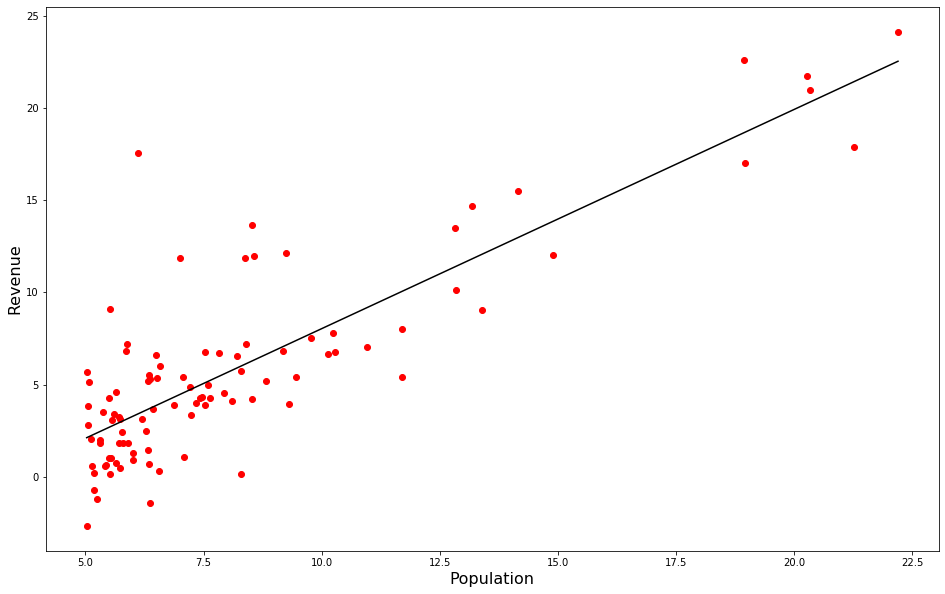

In [40]:
plt.figure(figsize=(16, 10))
plt.scatter(data[:, 0], data[:, 1], color='r')

plt.plot(x_vals, y_pred, color='k')

plt.xlabel('Population', size=16)
plt.ylabel('Revenue', size=16)
plt.show()

### 5. Постройте трехмерный график зависимости функции потерь от параметров модели (θ<sub>0</sub> и θ<sub>1</sub>) как в виде поверхности, так и в виде изолиний (contour plot).

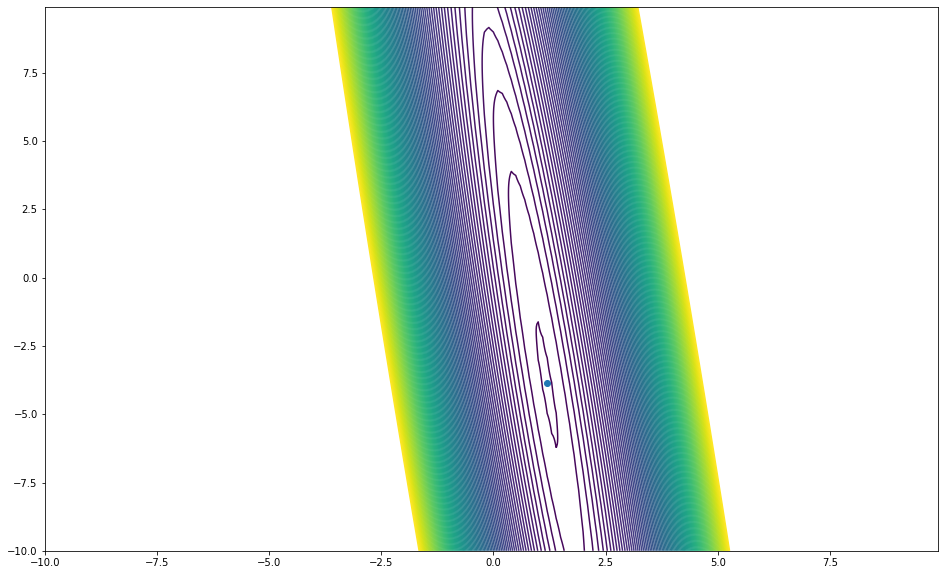

In [56]:
theta_0_range, theta_1_range = np.arange(-10, 10, 0.1), np.arange(-10, 10, 0.1) 
theta_0, theta_1 = np.meshgrid(theta_0_range, theta_1_range)

values = []
for w1, w2 in zip(theta_0.flatten(), theta_1.flatten()):
    model = Model(dim=1)
    model.w = np.array([w1, w2])
    
    loss = MSELoss(model)
    loss_value = loss(X, y)
    values.append(loss_value)
    
values = np.array(values)
values = values.reshape((len(theta_1_range), len(theta_0_range)))

fig = plt.figure(figsize=(16,10))
plt.contour(theta_0, theta_1, values, 
            levels=[i*10 for i in range(0,100)], cmap='viridis')
plt.scatter(*trained_model.w)

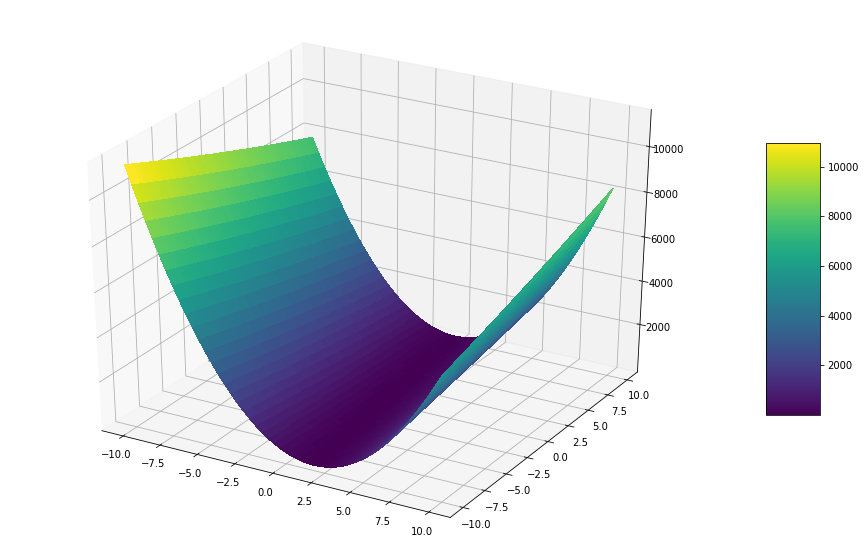

In [57]:
fig = plt.figure(figsize=(16,10))
ax = fig.gca(projection='3d')


# Plot the surface.
surf = ax.plot_surface(theta_0, theta_1, values, cmap='viridis',
                       linewidth=0, antialiased=False)

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

### 6. Загрузите набор данных **ex1data2.txt** из текстового файла.

In [3]:
ex1data2 = np.loadtxt('Data/Lab 1/ex1data2.txt', delimiter=',')
X, y = ex1data2[:, :2], ex1data2[:, 2]

### 7. Произведите нормализацию признаков. Повлияло ли это на скорость сходимости градиентного спуска? Ответ дайте в виде графика.

In [4]:
X_norm = (X - X.mean(axis=0)) / X.std(axis=0)

In [42]:
def train_model(X, y):
    model = Model(dim=2)
    loss = MSELoss(model)

    gradient_descent = get_gradient_descent(loss, alpha=0.01, eps=1e-6, n_iter=20)

    return gradient_descent(X, y)

results_without_norm = train_model(X, y)
results_with_norm = train_model(X_norm, y)
print('number of iterations: \n without normalization: {}, with normalization: {}'.format(
    results_without_norm['iter_num'], 
    results_with_norm['iter_num']))

number of iterations: 
 without normalization: 20, with normalization: 20


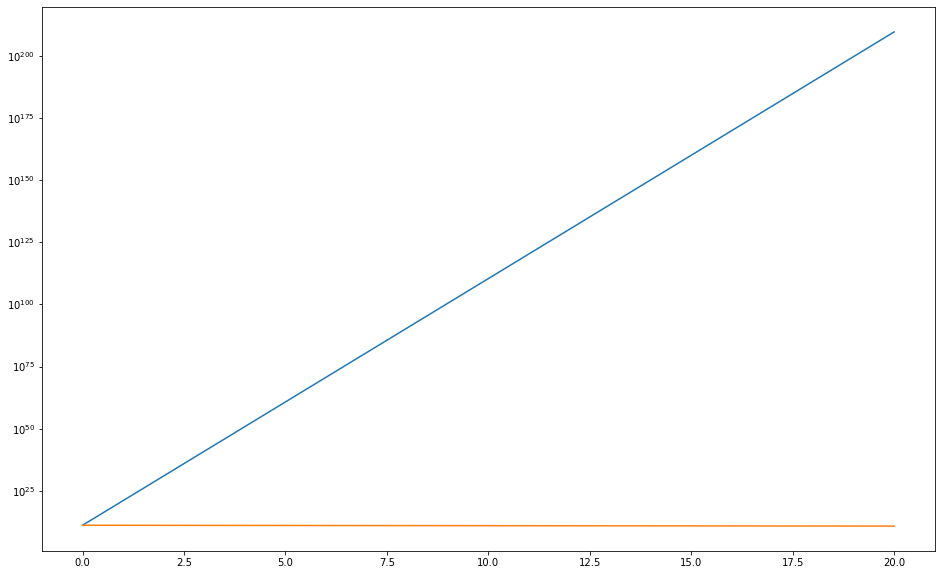

In [46]:
plt.figure(figsize=(16,10))
plt.yscale('log')
plt.plot(range(21), results_without_norm['loss_steps'])
plt.plot(range(21), results_with_norm['loss_steps'])

На графике видно, что без нормализации градиентный спуск расходится


### 8. Реализуйте функции потерь J(θ) и градиентного спуска для случая многомерной линейной регрессии с использованием векторизации.

In [47]:
class MSELossVectorized:
    def __init__(self, model):
        self.model = model
        
    def __call__(self, x, y):
        pred = np.array([self.model(x_i) for x_i in x])
        return np.mean((pred - y) ** 2)
    
    def grad(self, x, y):
        preds = np.array([self.model(x_i) for x_i in x])
        grads = np.array([self.model.grad(x_i) for x_i in x])
        
        errors = np.expand_dims(preds - y, axis=1)
        
        return np.mean(2 * grads * errors, axis=0)

### 9. Покажите, что векторизация дает прирост производительности.

In [48]:
model = results_with_norm['model']
loss_simple = MSELoss(model)
loss_vectorized = MSELossVectorized(model)

In [75]:
print('Скорость вычисления лосса без векторизации:')

%timeit -n 100 loss_simple(X_norm, y)

Скорость вычисления лосса без векторизации
204 µs ± 91.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [76]:
print('Скорость вычисления лосса с векторизацией:')

%timeit -n 100 loss_vectorized(X_norm, y)

Скорость вычисления лосса с векторизацией:
180 µs ± 87 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [77]:
print('Скорость вычисления градиента без векторизации:')

%timeit -n 100 loss_simple.grad(X_norm, y)

Скорость вычисления градиента без векторизации:
432 µs ± 150 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [78]:
print('Скорость вычисления градиента с векторизацией:')

%timeit -n 100 loss_vectorized.grad(X_norm, y)

Скорость вычисления градиента с векторизацией:
278 µs ± 90.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### 10. Попробуйте изменить параметр ɑ (коэффициент обучения). Как при этом изменяется график функции потерь в зависимости от числа итераций градиентного спуск? Результат изобразите в качестве графика.

In [82]:
def train_model(X, y, alpha=0.01):
    model = Model(dim=2)
    loss = MSELoss(model)

    gradient_descent = get_gradient_descent(loss, alpha=alpha, eps=1e-6)

    return gradient_descent(X, y)

results_01 = train_model(X_norm, y, alpha=0.01)
results_001 = train_model(X_norm, y, alpha=0.001)

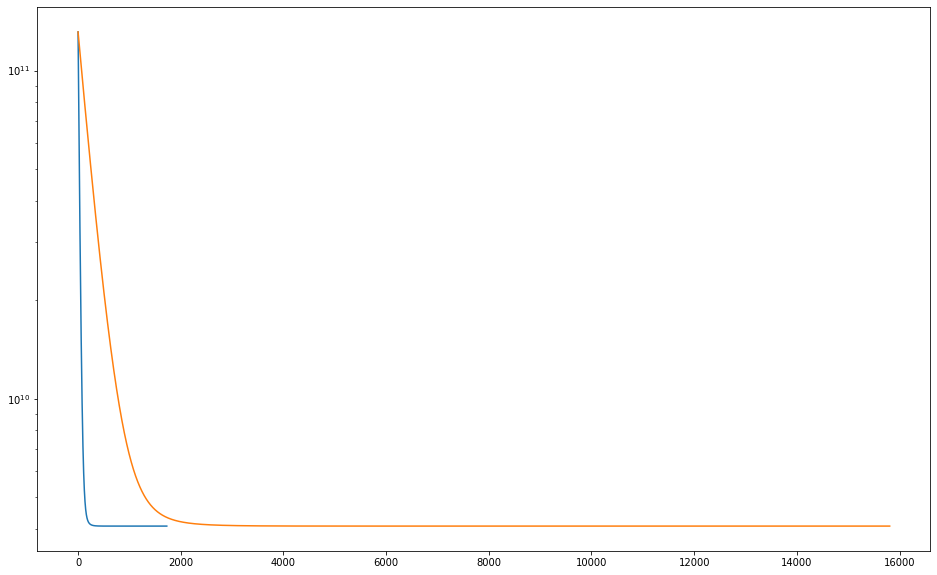

In [84]:
plt.figure(figsize=(16,10))
plt.yscale('log')
plt.plot(results_01['loss_steps'])
plt.plot(results_001['loss_steps'])

Из графика видно, что при меньшем альфа для достижения нужной точности требуется больше итераций.

### 11. Постройте модель, используя аналитическое решение, которое может быть получено методом наименьших квадратов. Сравните результаты данной модели с моделью, полученной с помощью градиентного спуска.

#### *Аналитическое решение:*

$$W = (X^T*X)^{-1}*X^T*y $$
$$b = \hat{y}$$

In [87]:
def analytical_solution(X, y):
    mean = np.mean(y)

    inv = np.linalg.inv(np.dot(X.T, X))
    mul = np.dot(X.T, y)
    
    return np.array(np.dot(inv, mul).tolist() + [mean])

In [104]:
print('Results of analytical solution:')
for i in analytical_solution(X_norm, y):
    print('\t', '{:.2f}'.format(i))
    
print('\nResults of gradient descent:')
for i in results_01['model'].w:
    print('\t', '{:.2f}'.format(i))

Results of analytical solution:
	 109447.80
	 -6578.35
	 340412.66

Results of gradient descent:
	 109447.78
	 -6578.34
	 340412.66
